In [5]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from tensorflow.keras.layers import Lambda
from keras import backend as K
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy

Question A1. Design and train a convolutional neural network (CNN). Inspect the CNN architecture. Sample
code provided for help.

In [7]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

train_X1 = train_X[0:100]
train_Y1 = train_Y[:100]

val_X = train_X[100:150]
val_Y_Onehot = to_categorical(train_Y[100:150])

train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.summary()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

Question A2. Train the model with the training data. Plot the training and validation losses for the training
session. Observe the graphs and interpret. Code below for help.

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.1127 - loss: 2.2957 - val_accuracy: 0.0800 - val_loss: 2.3007
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.1750 - loss: 2.1423 - val_accuracy: 0.2800 - val_loss: 2.2659
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.3152 - loss: 2.0013 - val_accuracy: 0.3200 - val_loss: 2.1572
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3760 - loss: 1.8441 - val_accuracy: 0.3400 - val_loss: 1.9386
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5000 - loss: 1.6087 - val_accuracy: 0.4600 - val_loss: 1.7294
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6692 - loss: 1.3430 - val_accuracy: 0.5200 - val_loss: 1.5546
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6758 - loss: 1.1989 - val_accuracy: 0.5600 - val_loss: 1.3382
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7129 - loss: 0.9964 - val_accuracy: 0.6200 - v

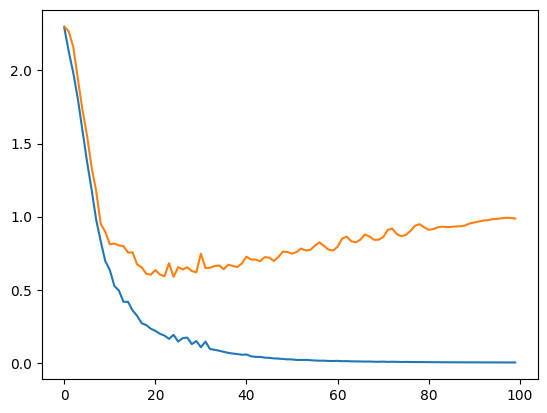

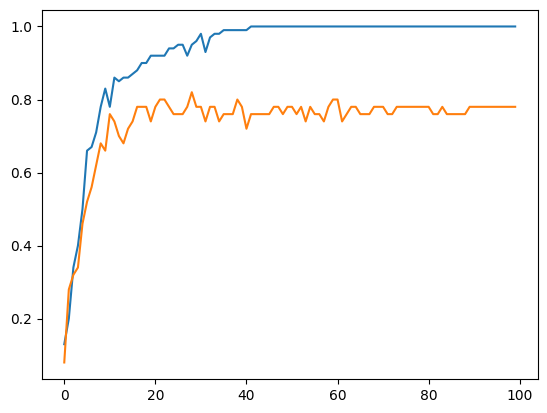

In [9]:
history = model.fit(train_X1, train_Y_one_hot, batch_size=64, epochs=100, validation_data=(val_X,val_Y_Onehot))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

Question A3. Evaluate the model accuracy with below code.

In [10]:
#Evaluate the model on the test data after training your model
score = model.evaluate(test_X[0:100],test_Y_one_hot[0:100], verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7092 - loss: 1.9889

Keras CNN binary accuracy: 0.699999988079071 



Question A4. Inspect the filters (at least a few of them) for the first convolution layer. Below code for help.

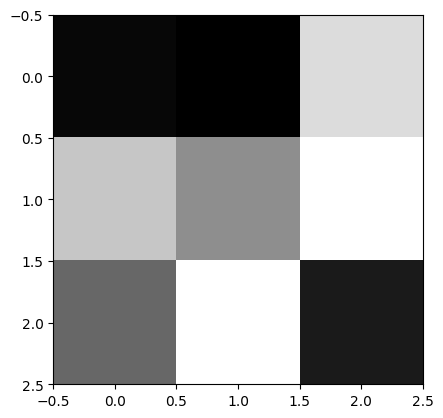

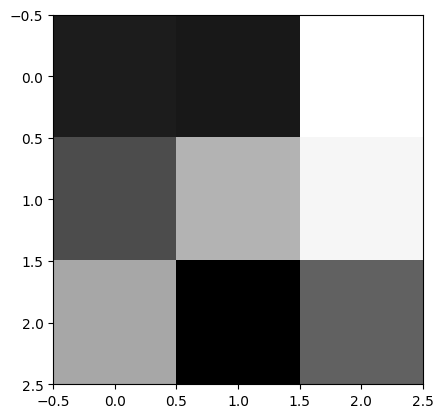

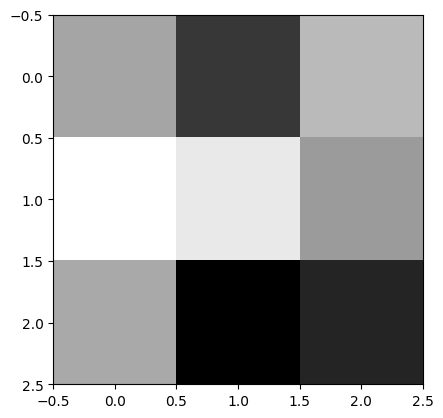

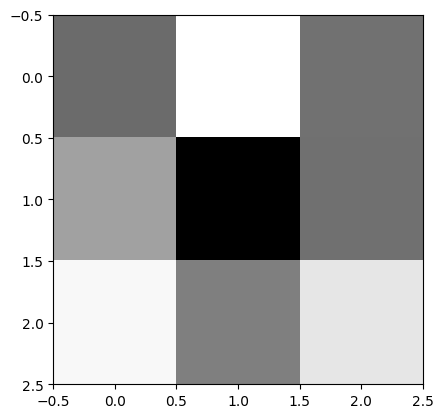

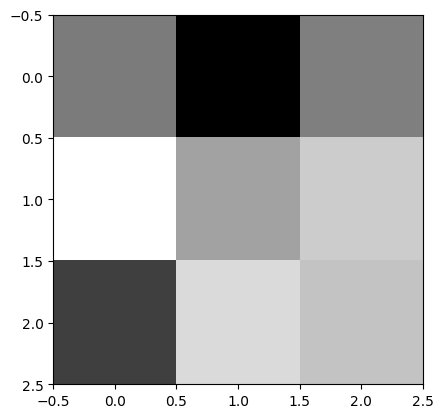

In [11]:
filters, biases = model.layers[0].get_weights()

for i in range(5):
  plt.imshow(filters[:,:,0,i], cmap='gray')
  plt.show()

Question A5. Inspect the impact a filter creates on an input image with 2D convolution. Below code for help.

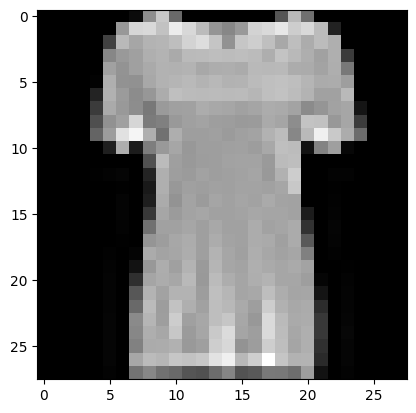

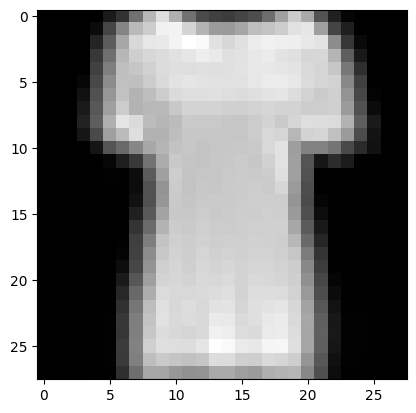

Original Image:
 [[0.         0.         0.         0.         0.         0.
  0.         0.04313726 0.5568628  0.78431374 0.41568628 0.
  0.         0.         0.         0.         0.         0.
  0.33333334 0.7254902  0.4392157  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.59607846 0.8392157  0.8509804  0.7607843  0.9254902  0.84705883
  0.73333335 0.58431375 0.5294118  0.6        0.827451   0.8509804
  0.90588236 0.8039216  0.8509804  0.7372549  0.13333334 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.25882354
  0.7254902  0.6509804  0.7058824  0.70980394 0.74509805 0.827451
  0.8666667  0.77254903 0.57254905 0.7764706  0.80784315 0.7490196
  0.65882355 0.74509805 0.6745098  0.7372549  0.6862745  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5294118
  0.6        0.6274

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Sample filter (Replace this with your actual filter)
filt = np.random.rand(3, 3, 3)  # Example 3x3x3 filter

# Load an image sample
im = train_X[10]

# Ensure the image is reshaped correctly
im = im.reshape(28, 28)

plt.imshow(im, cmap='gray')
plt.show()

# Ensure `filt[:,:,1]` exists and has correct shape
if filt.shape[0] >= 3 and filt.shape[1] >= 3:
    kernel = filt[:, :, 1].reshape(3, 3)  # Reshape only if it has correct dimensions

    # Perform 2D convolution
    ot = signal.convolve2d(im, kernel, boundary='symm', mode='same')

    # Display the filtered image
    plt.imshow(ot, cmap='gray')
    plt.show()

    print("Original Image:\n", im)
    print("Filter Kernel:\n", kernel)
    print("Filtered Output:\n", ot)
else:
    print("Error: `filt` does not have the expected shape (at least 3x3x3).")

Question A6. Design and implement a fully connected and dense network to perform classification on your
dataset. Train the network with training & validation sets.

In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dir = "/content/drive/MyDrive/skin-disease-datasaet/train_set"
test_dir = "/content/drive/MyDrive/skin-disease-datasaet/test_set"

# Image Parameters
img_size = (64, 64)  # Resize all images to 64x64
batch_size = 32

# Load images using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # 20% for validation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Training data
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define Fully Connected Neural Network
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Convert 3D image to 1D vector
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

Found 741 images belonging to 8 classes.
Found 183 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 295s 12s/step - accuracy: 0.1104 - loss: 6.8918 - val_accuracy: 0.1475 - val_loss: 2.2140
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.1207 - loss: 2.4609 - val_accuracy: 0.1421 - val_loss: 2.0619
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.1507 - loss: 2.0676 - val_accuracy: 0.1694 - val_loss: 2.0489
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.1136 - loss: 2.1091 - val_accuracy: 0.1038 - val_loss: 2.0549
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.1212 - loss: 2.0663 - val_accuracy: 0.1475 - val_loss: 2.0440
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.1412 - loss: 2.0947 - val_accuracy: 0.1475 - val_loss: 2.0691
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.1386 - loss: 2.0704 - val_accuracy: 0.1475 - val_loss: 2.0645
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.1542 - loss: 2.0642 - val_accuracy: 0.

Question A7. Make a plot of training loss and validation loss to check for the regular fit of the trained network.

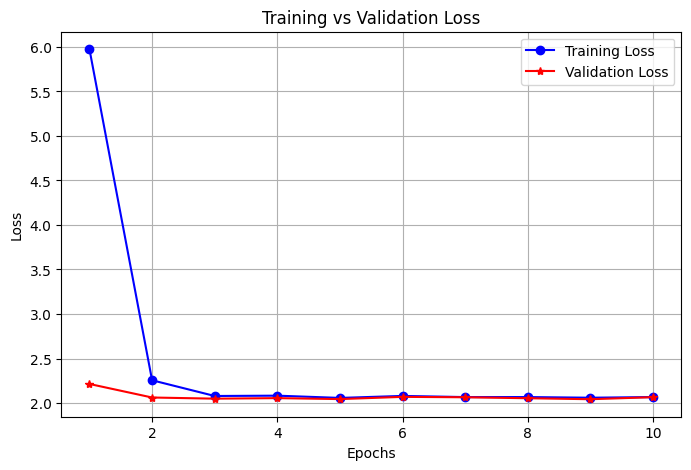

In [18]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Question A8. Test the network with your test set and observe the metrics.

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.1444 - loss: 2.0679
Test Accuracy: 0.1416
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step

Classification Report:
                             precision    recall  f1-score   support

            BA- cellulitis       0.14      1.00      0.25        33
               BA-impetigo       1.00      0.00      0.00        20
           FU-athlete-foot       1.00      0.00      0.00        32
            FU-nail-fungus       1.00      0.00      0.00        33
               FU-ringworm       1.00      0.00      0.00        23
PA-cutaneous-larva-migrans       1.00      0.00      0.00        25
             VI-chickenpox       1.00      0.00      0.00        34
               VI-shingles       1.00      0.00      0.00        33

                  accuracy                           0.14       233
                 macro avg       0.89      0.12      0.03       233
              weighted avg       0.88      0.14      0.04       233



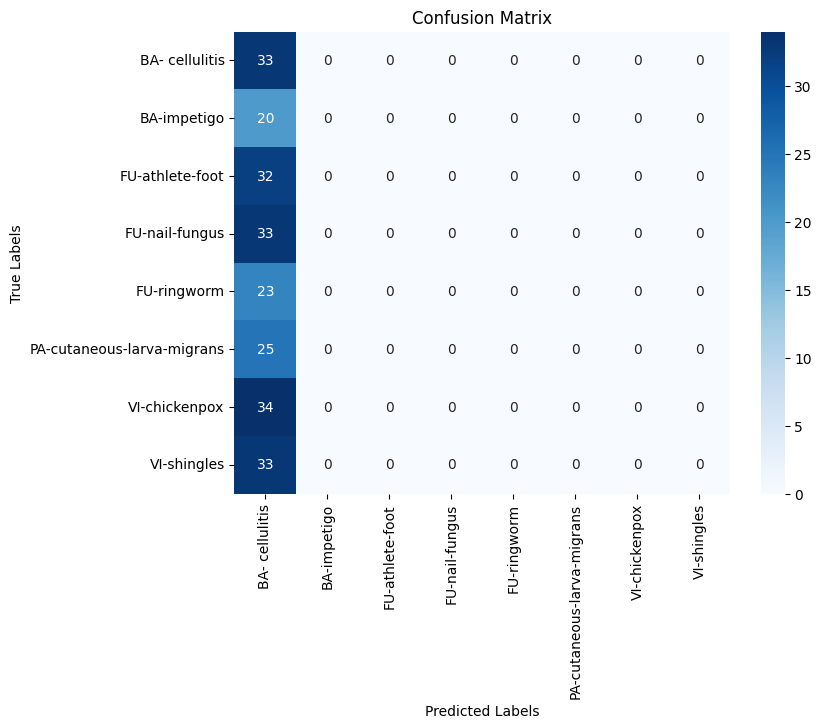

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_generator.classes  # True labels

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), zero_division=1)
print("\nClassification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()